In [9]:
from torchvision.models import ResNet50_Weights,resnet50
from torchvision.transforms import Resize,Compose
import torchvision
from torchvision.datasets import ImageNet
from PIL.Image import open
import torch
from warnings import filterwarnings
filterwarnings('ignore')

# Pretrained 모델 저장
weights=ResNet50_Weights.IMAGENET1K_V2

preprocess = weights.transforms()
model=resnet50(weights)
model.eval()
print(model.fc)
# imagenet의 클래스들 불러오고 저장
classes=weights.value.meta['categories']

img=open(r'C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\chicken.jpg')

img_transformed = preprocess(img)
img_transformed = torch.unsqueeze(img_transformed,0)
print(img_transformed.shape)

class_id=torch.argmax(model(img_transformed),dim=1)
prediction=classes[class_id]
prediction

Linear(in_features=2048, out_features=1000, bias=True)
torch.Size([1, 3, 224, 224])


'cock'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


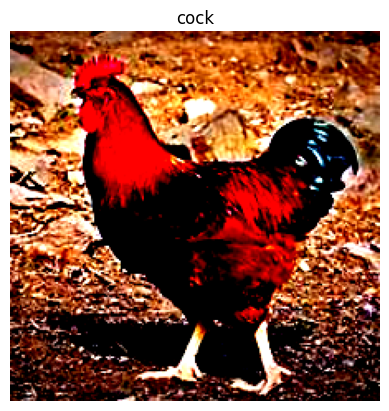

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(torch.squeeze(img_transformed).permute(1,2,0))
plt.title(prediction)
plt.axis(False)
plt.show()

# stanford 강아지 분류 (전이학습)

# 데이터셋 내부 탐색

In [108]:
from pathlib import Path
import os

file_path = Path(r'C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\\')

for dirpath, dirnames, filenames in os.walk(file_path):
    print(f'{dirpath}\n내에 {len(dirnames)}개의 폴더가 있습니다. {len(filenames)}개의 파일이 존재합니다.\n')

file_path

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images
내에 120개의 폴더가 있습니다. 0개의 파일이 존재합니다.

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02085620-Chihuahua
내에 0개의 폴더가 있습니다. 152개의 파일이 존재합니다.

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02085782-Japanese_spaniel
내에 0개의 폴더가 있습니다. 185개의 파일이 존재합니다.

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02085936-Maltese_dog
내에 0개의 폴더가 있습니다. 252개의 파일이 존재합니다.

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02086079-Pekinese
내에 0개의 폴더가 있습니다. 149개의 파일이 존재합니다.

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02086240-Shih-Tzu
내에 0개의 폴더가 있습니다. 214개의 파일이 존재합니다.

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02086646-Blenheim_spaniel
내에 0개의 폴더가 있습니다. 188개의 파일이 존재합니다.

C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02086910-papillon
내에 0개의 폴더가

WindowsPath('C:/Users/hyssk/Myopencv/DeepLearningVision/pretrained_model/images/Images')

# Image_list (확장자가 jpg인 파일들 긁어오기)

img: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=294x216 at 0x1FEF4D26808>
Random image path: C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\images\Images\n02095314-wire-haired_fox_terrier\n02095314_2196.jpg
Image class : n02095314-wire-haired_fox_terrier
Image height:216
Image width:294


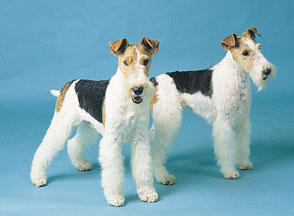

In [151]:
import random
from PIL.Image import open
# jpg 확장자 긁어오기
image_list=list(file_path.glob('*/*.jpg'))

random_image = random.choice(image_list)
random_image_class=random_image.parent.stem

img = open(random_image)
print(f'img: {img}')
# 5. Print metadata
print(f"Random image path: {random_image}")
print(f"Image class : {random_image_class}")
print(f"Image height:{img.height}")
print(f"Image width:{img.width}")
img

# Visualizing our Data (데이터 확인하기)

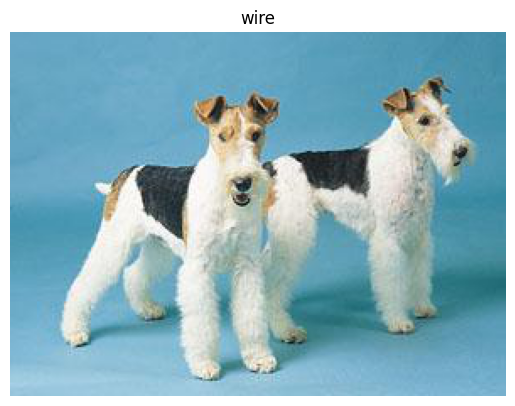

In [152]:
import numpy as np
import matplotlib.pyplot as plt


def image_path_plotting(path:str) -> None:
    img = open(path)
    class_name = Path(path).parent.stem
    img = np.asarray(img)
    plt.figure()
    plt.imshow(img)
    plt.title(class_name.split('-')[1])
    plt.axis(False)
    plt.show()

image_path_plotting(random_image)

# Train dir 과 Test_dir 셋업

In [155]:
# Setup train and testing paths
train_dir=file_path / "train"
test_dir=file_path / "test"


WindowsPath('C:/Users/hyssk/Myopencv/DeepLearningVision/pretrained_model/images/Images/test')

# Transforming Data 데이터 증강

In [172]:
from torchvision import transforms,datasets
from splitfolders import ratio
data_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5),
    transforms.ToTensor()
])

img = open(r'C:\Users\hyssk\Myopencv\DeepLearningVision\pretrained_model\dog.jpg')
transformed_img=data_transform(img)
print(f'img의 shape: {np.asarray(img).shape}')
print(f'data_transform 적용 후 shape: {transformed_img.shape}')

ratio(file_path, output="output", seed=1337, ratio=(.8, .2))

img의 shape: (180, 273, 3)
data_transform 적용 후 shape: torch.Size([3, 224, 224])


Copying files: 20580 files [02:21, 145.94 files/s]
